In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your data
# Replace 'your_data.csv' with the path to your CSV file
df_epochs = pd.read_csv("./../docs/results/feature_model_20_epochs_epochs.csv")
df_train_loss = pd.read_csv("./../docs/results/feature_model_20_epochs_train_loss.csv")
df_val_loss = pd.read_csv("./../docs/results/feature_model_20_epochs_val_loss.csv")


df_train_loss = df_train_loss.pivot_table(
    values="value", index=df_train_loss["step"], columns="key", aggfunc="first"
)
df_train_loss = df_train_loss.dropna()

plot_data_train = df_train_loss[["epoch", "train_loss"]]

# Step 3: Create the plot
# plt.figure(figsize=(8, 8))
# sns.boxplot(x='epoch', y='train_loss', data=plot_data_train)
# plt.title('Box Plot of Train loss against Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Train Loss')

# plt.xticks(rotation=45)  # Rotates labels to 45 degrees
# ax = plt.gca()  # Get the current axis
# labels = ax.get_xticklabels()  # Get x-axis labels
# ticks = ax.get_xticks()  # Get x-axis tick positions
# plt.xticks(ticks[::2], labels[::2])  # Set every other tick and label


# plt.savefig('./images/train_loss_v_epoch_boxplot.png')

In [95]:
print(df_train_loss.head())

key   epoch  train_loss
step                   
4       0.0    1.780450
9       0.0    0.991715
14      1.0    0.615538
19      1.0    0.547491
24      2.0    0.594214


In [96]:
print(df_val_loss.head())

                             run_id         key     value  step      timestamp
0  e62952403be64274a8cadb75cfb336ce  train_loss  1.780450     4  1715055498974
1  e62952403be64274a8cadb75cfb336ce  train_loss  0.991715     9  1715055499177
2  e62952403be64274a8cadb75cfb336ce  train_loss  0.615538    14  1715055506015
3  e62952403be64274a8cadb75cfb336ce  train_loss  0.547491    19  1715055506301
4  e62952403be64274a8cadb75cfb336ce  train_loss  0.594214    24  1715055506824


<Figure size 640x480 with 0 Axes>

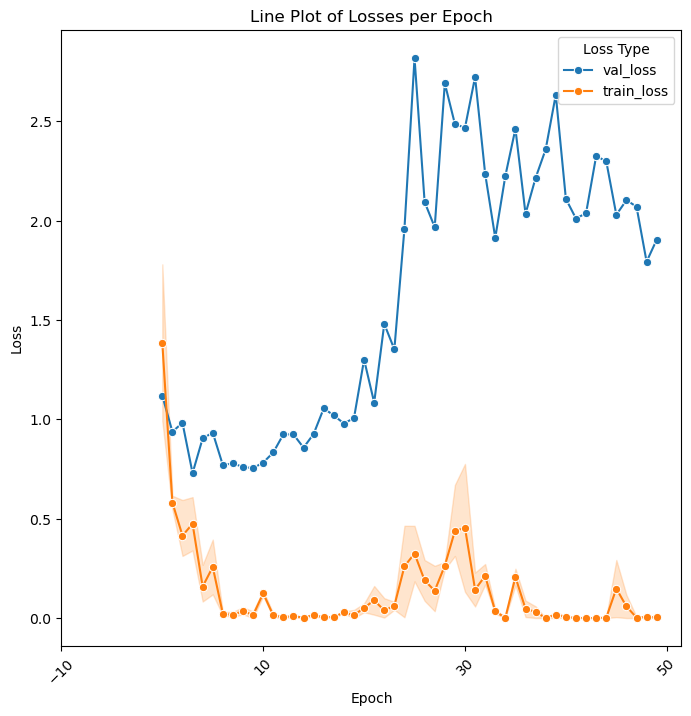

In [97]:
df_val_loss = df_val_loss.pivot_table(
    values="value", index=df_val_loss["step"], columns="key", aggfunc="first"
)
# df_val_loss = df_val_loss.dropna()

plot_data_val = df_val_loss[["epoch", "val_loss", "train_loss"]]

plot_data_val = df_val_loss.reset_index().melt(
    id_vars=["epoch"],
    value_vars=["val_loss", "train_loss"],
    var_name="Type",
    value_name="Loss",
)

# Step 3: Create the plot
plt.clf()
plt.figure(figsize=(8, 8))
sns.lineplot(
    x="epoch", y="Loss", hue="Type", data=plot_data_val, marker="o"
)  # Added marker for clarity
plt.title("Line Plot of Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")


ax = plt.gca()  # Get the current axis
ax.set_yscale("log")
ticks = ax.get_xticks()  # Get x-axis ticks
labels = [item.get_text() for item in ax.get_xticklabels()]  # Get x-axis labels
plt.xticks(ticks[::2], labels[::2], rotation=45)

plt.legend(title="Loss Type")


plt.savefig("./images/validation_loss_v_epoch_boxplot_logged.png")